6. Fundamental terms in portfolio optimization
There are some statistical terms required in optimization process without which an optimal portfolio can’t be defined. Don’t worry, I will simplify it and make it easy and clear.

We will go through each one through an example.

In this example, we are considering a portfolio made up of stocks from just 2 companies, Tesla and Facebook.

Step 1: Pull the stock price data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2019.

In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Data
test = data.DataReader(['TSLA', 'AAPL'], 'yahoo', start='2018/01/01', end='2019/12/31')
test.head()

Attributes  Adj Close                 Close                  High             \
Symbols          TSLA       AAPL       TSLA       AAPL       TSLA       AAPL   
Date                                                                           
2018-01-02  21.368668  41.018429  21.368668  43.064999  21.474001  43.075001   
2018-01-03  21.150000  41.011288  21.150000  43.057499  21.683332  43.637501   
2018-01-04  20.974667  41.201771  20.974667  43.257500  21.236668  43.367500   
2018-01-05  21.105333  41.670879  21.105333  43.750000  21.149332  43.842499   
2018-01-08  22.427334  41.516106  22.427334  43.587502  22.468000  43.902500   

Attributes        Low                  Open                  Volume  \
Symbols          TSLA       AAPL       TSLA       AAPL         TSLA   
Date                                                                  
2018-01-02  20.733334  42.314999  20.799999  42.540001   65283000.0   
2018-01-03  21.036667  42.990002  21.400000  43.132500   67822500.0   
2018-01-04  20.378668  43.020000  20.858000  43.134998  149194500.0   
2018-01-05  20.799999  43.262501  21.108000  43.360001   68868000.0   
2018-01-08  21.033333  43.482498  21.066668  43.587502  147891000.0   

Attributes               
Symbols            AAPL  
Date                     
2018-01-02  102223600.0  
2018-01-03  118071600.0  
2018-01-04   89738400.0  
2018-01-05   94640000.0  
2018-01-08   82271200.0

In [3]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,TSLA,AAPL
Date,,
2018-01-02,21.368668,41.018429
2018-01-03,21.150000,41.011288
2018-01-04,20.974667,41.201771
2018-01-05,21.105333,41.670879
2018-01-08,22.427334,41.516106


In [4]:
# Log of percentage change
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

The variance in prices of stocks of Tesla are an important indicator of how volatile this investment will be (how returns can fluctuate).

It can be calculated for each company by using built in .var() function. Under the hood, the formula implemented by this function is given by:

s2=∑i=1N(xi–x¯)2/N−1

In [5]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0011483733956322896

In [6]:
aapl = test['AAPL'].pct_change().apply(lambda x: np.log(1+x))
aapl.head()

Date
2018-01-02         NaN
2018-01-03   -0.000174
2018-01-04    0.004634
2018-01-05    0.011321
2018-01-08   -0.003721
Name: AAPL, dtype: float64

In [7]:
# Variance
var_aapl =aapl.var()
var_aapl
#> .00045697258417022536

0.000302777102866675

Volatility is measured as the standard deviation of a company’s stock.

If you carefully look at the formula for standard deviation, you will understand that it is just the square root of variance.

But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

250 is used because there are 250 trading days in a year.

In [8]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
aapl_vol = np.sqrt(var_aapl * 250)
tesla_vol, aapl_vol
#> .5358109337568289  .33799873674698305

(0.53581092645454, 0.2751259270164641)

<AxesSubplot:xlabel='Symbols'>

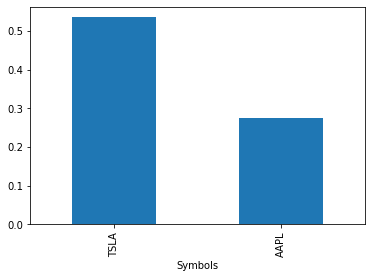

In [9]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

Covariance measures the directional relationship between the returns on two assets.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

We can calculate the covariance of Tesla and Facebook by using the .cov() function.

In [10]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,TSLA,AAPL
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,-0.000174
2018-01-04,-0.008325,0.004634
2018-01-05,0.006210,0.011321
2018-01-08,0.060755,-0.003721


In [11]:
# Covariance
test1['TSLA'].cov(test1['AAPL'])
#> .00018261623156030972

0.00019007741993037569

You can notice that there is small positive covariance between Tesla and AAPL.

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

You can think of correlation as a scaled version of covariance, where the values are restricted to lie between -1 and +1.

A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

This is calculated using the .corr() function.

In [12]:
test1['TSLA'].corr(test1['AAPL'])
#> .2520883272466132

0.3223498351517815

Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise, as you will see further.

For expected returns, you need to define weights for the assets choosen.

In simpler terms, this means you need to decide what percentage of your total money to you want to hold in each company’s stock.

Usually this decision is done by using the optimization techniques we will discuss later but for now we will consider random weights for Tesla and Facebook.

First, let’s compute the log of percentage change.

In [13]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,TSLA,AAPL
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,-0.000174
2018-01-04,-0.008325,0.004634
2018-01-05,0.006210,0.011321
2018-01-08,0.060755,-0.003721


Weights
Let’s define an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these two stocks. They must add up to 1.

So, the problem of portfolio optimization is nothing but to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).

In [14]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
TSLA    0.000530
AAPL    0.001122
dtype: float64

The total expected return for a portfolio is given by:

E(Rp)=w1E(R1)+w2E(R2)+…..wnE(Rn)
Thus, e_r, or total expected return can be calculated as:

In [16]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r
#> .0003027691524101118

0.0010036208032351513

7. Building an optimal risky portfolio
Now that you have gone through the building blocks of portfolio optimization, it is time to create an optimal portfolio using the same concepts.

We will be using stocks from 4 companies, namely, Apple, Nike, Google and Amazon for a period of 5 years.

You will learn to calculate the weights of assets for each one. Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. You will also learn a new term called Sharpe Ratio.

Let’s get started by pulling the required asset data from Yahoo.

In [17]:
# Import data
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')
df.head()

Attributes  Adj Close                                     Close             \
Symbols          AAPL        NKE      GOOGL     AMZN       AAPL        NKE   
Date                                                                         
2015-01-02  24.644022  43.770927  26.477501  15.4260  27.332500  47.514999   
2015-01-05  23.949753  43.066204  25.973000  15.1095  26.562500  46.750000   
2015-01-06  23.952007  42.812881  25.332001  14.7645  26.565001  46.474998   
2015-01-07  24.287872  43.697224  25.257500  14.9210  26.937500  47.435001   
2015-01-08  25.221060  44.705936  25.345501  15.0230  27.972500  48.529999   

Attributes                           High             ...        Low           \
Symbols         GOOGL     AMZN       AAPL        NKE  ...      GOOGL     AMZN   
Date                                                  ...                       
2015-01-02  26.477501  15.4260  27.860001  48.474998  ...  26.393999  15.3480   
2015-01-05  25.973000  15.1095  27.162500  47.275002  ...  25.887501  15.0425   
2015-01-06  25.332001  14.7645  26.857500  47.075001  ...  25.277500  14.6190   
2015-01-07  25.257500  14.9210  27.049999  47.650002  ...  25.182501  14.7665   
2015-01-08  25.345501  15.0230  28.037500  48.549999  ...  24.750999  14.8055   

Attributes       Open                                      Volume             \
Symbols          AAPL        NKE      GOOGL     AMZN         AAPL        NKE   
Date                                                                           
2015-01-02  27.847500  48.275002  26.629999  15.6290  212818400.0  4985800.0   
2015-01-05  27.072500  47.255001  26.357500  15.3505  257142000.0  6889200.0   
2015-01-06  26.635000  46.945000  26.025000  15.1120  263188400.0  7576000.0   
2015-01-07  26.799999  46.805000  25.547501  14.8750  160423600.0  7256000.0   
2015-01-08  27.307501  47.830002  25.075500  15.0160  237458000.0  5978200.0   

Attributes                          
Symbols          GOOGL        AMZN  
Date                                
2015-01-02  26480000.0  55664000.0  
2015-01-05  41182000.0  55484000.0  
2015-01-06  54456000.0  70380000.0  
2015-01-07  46918000.0  52806000.0  
2015-01-08  73054000.0  61768000.0  

[5 rows x 24 columns]

In [18]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2015-01-02,24.644022,43.770927,26.477501,15.4260
2015-01-05,23.949753,43.066204,25.973000,15.1095
2015-01-06,23.952007,42.812881,25.332001,14.7645
2015-01-07,24.287872,43.697224,25.257500,14.9210
2015-01-08,25.221060,44.705936,25.345501,15.0230


### 8. Covariance and Correlation matrix
The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other. When we had a 2 asset portfolio, we directly plugged in the names of the assets into .cov() and .corr() functions.

In this case, we will need a matrix for better visualisation. This is also achieved by using the same 2 functions on our dataframe df.

Note that we perform necessary operations to display log change in prices of stocks each day.

In [19]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000246,0.000084,0.000122,0.000142
NKE,0.000084,0.000219,0.000085,0.000092
GOOGL,0.000122,0.000085,0.000221,0.000176
AMZN,0.000142,0.000092,0.000176,0.000333


The covariance between Apple and Apple, or Nike and Nike is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.
A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.
A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [20]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.360911,0.524818,0.496610
NKE,0.360911,1.000000,0.387435,0.341530
GOOGL,0.524818,0.387435,1.000000,0.647942
AMZN,0.496610,0.341530,0.647942,1.000000


As you can see, an asset always has a perfectly positive correlation of 1 with itself.

### Portfolio Variance
The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:

$$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$

Here, wi and wj denote weights of all assets from 1 to n (in our case from 1 to 4) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

In [21]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00016079368757322487

Thus we have found the portfolio variance. But for truly optimizing the portfolio, we cant plug in random weights. We will need to calculate it according to what gives us maximum expected returns.

How will you find the portfolio expected return?

### 9. Portfolio expected returns
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [22]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.361281
NKE      0.162404
GOOGL    0.155401
AMZN     0.295903
dtype: float64

In [23]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.20549013290291668

Plotting the efficient frontier
This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [24]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.247789
NKE      0.233831
GOOGL    0.235281
AMZN     0.288655
dtype: float64

In [25]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.361281,0.247789
NKE,0.162404,0.233831
GOOGL,0.155401,0.235281
AMZN,0.295903,0.288655


Amazon has the maximum risk attached but it also offers the maximum returns. Apple lies somewhere in the middle, with average risk and return rates.

### Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

### We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it’s done.

In [26]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [27]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [28]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [29]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.248154,0.201535,0.349142,0.088055,0.418639,0.144164
1,0.255200,0.225343,0.093352,0.141969,0.198245,0.566434
2,0.207081,0.187760,0.168457,0.401970,0.328626,0.100946
3,0.210187,0.189581,0.144379,0.477335,0.223709,0.154577
4,0.309647,0.215054,0.522599,0.068158,0.080592,0.328651


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

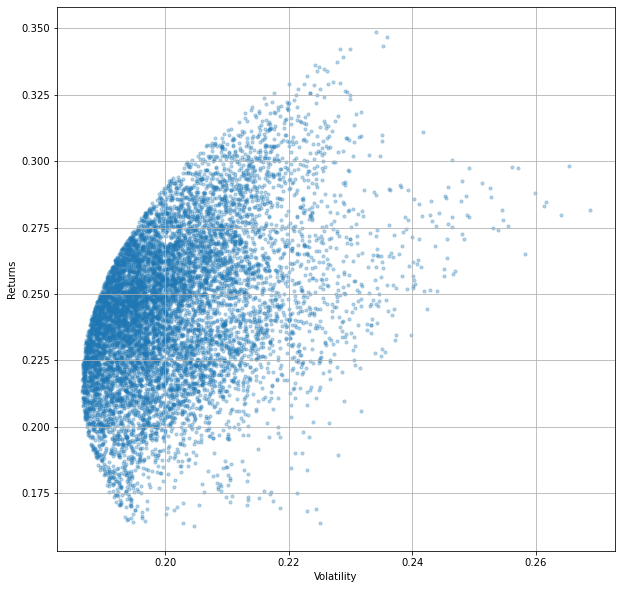

In [30]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

### How to read the Efficient Frontier?
Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

1. Minimum volatility (left most point)
2. Maximum returns (top most point)

And everything in between.

In [31]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.213852
Volatility      0.186540
AAPL weight     0.256158
NKE weight      0.406251
GOOGL weight    0.317178
AMZN weight     0.020414
Name: 9328, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 39%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

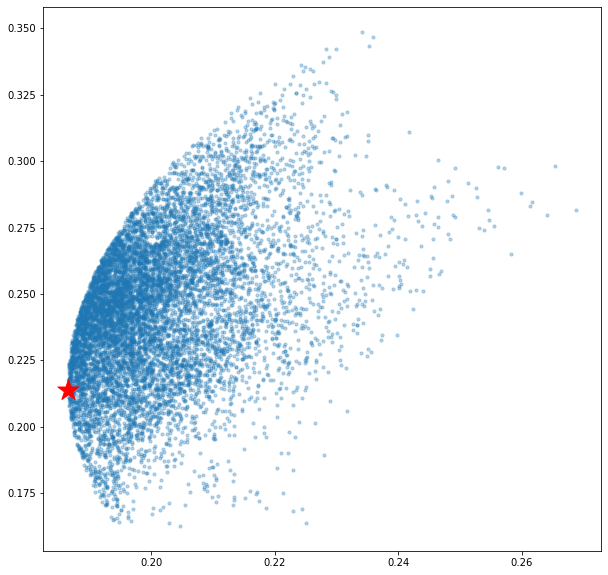

In [32]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

### The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?
This is done by using a parameter called the Sharpe Ratio.

Sharpe Ratio
The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio.

![sharpe formula](image/Sharpe-Ratio-300x149.jpg)

### Optimal Risky Portfolio
An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.



In [33]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.342380
Volatility      0.228240
AAPL weight     0.799039
NKE weight      0.043067
GOOGL weight    0.000095
AMZN weight     0.157800
Name: 7981, dtype: float64

You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.

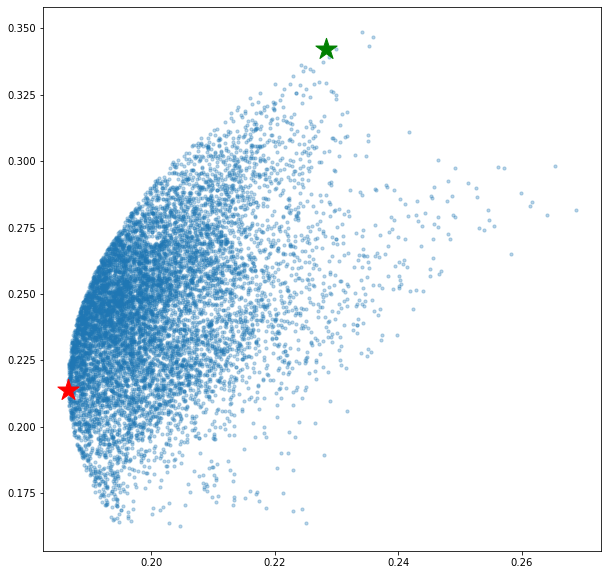

In [34]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.

References
- Video series by Finquest (https://www.youtube.com/watch?v=Mb4H3MaJnl8&list=PLLVfjXL2pnkQQXmBMPu_NIst57AKak5Z1)
- Investopedia (https://www.investopedia.com/terms/p/portfoliomanagement.asp)